In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sales.csv', parse_dates=['Date'])

In [3]:
data.head()

,Date,Article_ID,Country_Code,Sold_Units
0,2017-08-17,1132,AT,1
1,2017-08-18,1132,AT,1
2,2017-08-21,1132,AT,1
3,2017-08-22,1132,AT,1
4,2017-09-06,1132,AT,1


In [4]:
data.tail()

,Date,Article_ID,Country_Code,Sold_Units
4844,2018-12-11,5972,SE,1
4845,2019-01-01,5972,SE,3
4846,2019-01-20,5972,SE,1
4847,2019-01-23,5972,SE,1
4848,2019-01-30,5972,SE,1


In [5]:
data.isnull().sum()

Date            0
Article_ID      0
Country_Code    0
Sold_Units      0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['Article_ID'] = data['Article_ID'].astype('int')
data['Country_Code'] = data['Country_Code'].str.strip()
data['Country_Code'] = data['Country_Code'].astype('str')

In [8]:
data.dtypes

Date            datetime64[ns]
Article_ID               int32
Country_Code            object
Sold_Units               int64
dtype: object

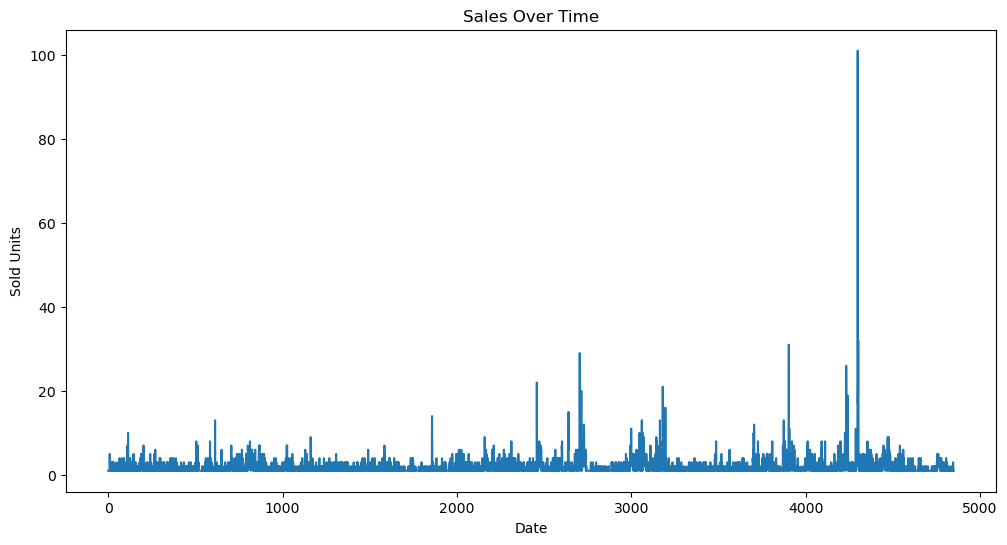

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sold_Units'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sold Units')
plt.show()

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [12]:
data['day_of_week'] = data.index.dayofweek

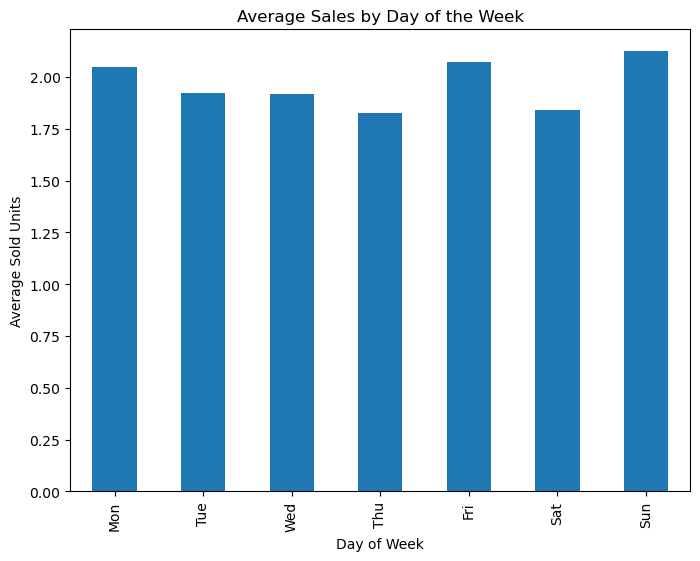

In [13]:
plt.figure(figsize=(8, 6))
data.groupby('day_of_week')['Sold_Units'].mean().plot(kind='bar')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sold Units')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
monthly_sales = data['Sold_Units'].resample('M').sum()

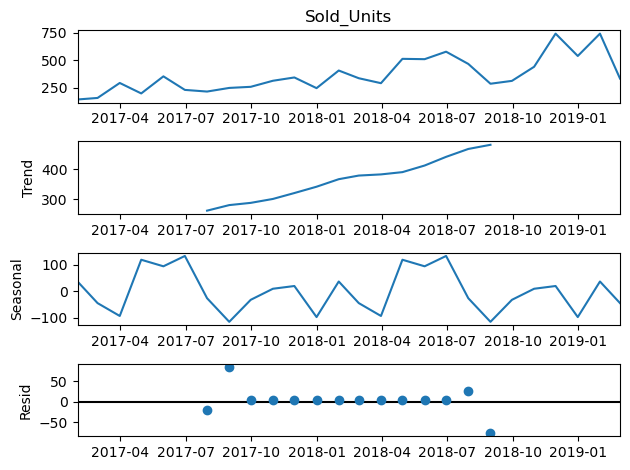

In [16]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()